# SSPI Dynamic Line Plots

Created by Izzy Weiss April 29, 2024. 

In this codebook, there are 3 functions that plot the SSPI time series data. The first function ```lineplot()``` plots the indicator over time for all SSPI countries. The second function ```top_10``` plots the top 10 highest countries by mean score. The third function ```bottom_10``` plots the bottom 10 lowest countries by mean score. All of the functions take 2 arguments, the name of the data frame, and the indicator code that you are plotting (in string form). Additionally, all functions print out which countries were not found in the dataframe arguement.

Make sure your run this cell first as it contains all the packages we need.

In [1]:
import pandas as pd
import pycountry
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import wbdata

ModuleNotFoundError: No module named 'wbdata'

In [ ]:
def get_country_name_from_iso(iso_code):
        try:
            country = pycountry.countries.get(alpha_3=iso_code.upper())
            if country:
                return country.name
            else:
                return "country not found"
        except AttributeError:
            return "invalid ISO code"

In [ ]:
def line_plot(dataframe, indicator_code):
    """
    function creates a line plot of time series data
    parameters:
        - dataframe, which is the time series data previously read in
        - indicator_code, needs to be a string name of the indicator code you are plotting
    """
    def get_country_name_from_iso(iso_code):
        try:
            country = pycountry.countries.get(alpha_3 = iso_code.upper())
            if country:
                return country.name
            else:
                return "country not found"
        except AttributeError:
            return "invalid ISO code"

    dataframe['CountryName'] = dataframe['CountryCode'].apply(get_country_name_from_iso)
    data_pivoted = dataframe.pivot(index= 'CountryName', columns = 'Year', values = 'Score')
    data_pivoted.reset_index

    sspi_countries = np.array(['Argentina', 'Australia', 'Austria', 'Belgium','Brazil','Canada','Chile','China','Colombia','Czechia',
    'Denmark','Estonia','Finland','France','Germany','Greece','Hungary','Iceland','India','Indonesia','Ireland','Israel','Italy','Japan',
    'Korea, Republic of','Kuwait','Latvia','Lithuania','Luxembourg','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal','Russian Federation',
    'Saudi Arabia','Singapore','Slovakia','Slovenia','South Africa','Spain','Sweden','Switzerland','Türkiye','United Arab Emirates',
    'United Kingdom','United States','Uruguay'])

    sspi_countries_filtered = []
    countries_not_found = []
    for country in sspi_countries:
        if country in data_pivoted.index:
            sspi_countries_filtered.append(country)
        else:
            countries_not_found.append(country)
    
    for country in sspi_countries:
        if country in data_pivoted.index:
            plt.plot(data_pivoted.columns, data_pivoted.loc[country], label = country)

    plt.title(indicator_code + " Score throughout time")
    plt.xlabel('Time')
    plt.ylabel(indicator_code + 'Score')
    plt.legend(title = 'Country', bbox_to_anchor=(1.05,1), loc='upper left')
    plt.grid(True)
    plt.show()

   # Print countries not found in the index
    if countries_not_found:
        print("Countries in sspi_countries but not found in the DataFrame's index:")
        print(countries_not_found)

In [ ]:
def top_10(dataframe, indicator_code):
    """
    function creates a line plot of time series data
    parameters:
        - dataframe, which is the time series data previously read in
        - indicator_code, needs to be a string name of the indicator code you are plotting
    """
    def get_country_name_from_iso(iso_code):
        try:
            country = pycountry.countries.get(alpha_3=iso_code.upper())
            if country:
                return country.name
            else:
                return "country not found"
        except AttributeError:
            return "invalid ISO code"

    dataframe['CountryName'] = dataframe['CountryCode'].apply(get_country_name_from_iso)
    data_pivoted = dataframe.pivot(index='CountryName', columns='Year', values='Score')

    sspi_countries = np.array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Czechia',
                               'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
                               'Korea, Republic of', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Russian Federation',
                               'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Türkiye', 'United Arab Emirates',
                               'United Kingdom', 'United States', 'Uruguay'])

    # Filter out countries not present in the DataFrame's index
    sspi_countries_filtered = []
    countries_not_found = []
    for country in sspi_countries:
        if country in data_pivoted.index:
            sspi_countries_filtered.append(country)
        else:
            countries_not_found.append(country)

    mean_values_subset = data_pivoted.loc[sspi_countries_filtered].mean(axis=1)
    sorted_countries_descending = mean_values_subset.sort_values(ascending=False)
    top_10_countries_subset = sorted_countries_descending.head(10)

    for country in top_10_countries_subset.index:
        plt.plot(data_pivoted.columns, data_pivoted.loc[country], label=country)

    plt.title(indicator_code + " Score throughout time (top 10 mean value)")
    plt.xlabel('Time')
    plt.ylabel(indicator_code + ' Score')
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

    # Print countries not found in the index
    if countries_not_found:
        print("Countries in sspi_countries but not found in the DataFrame's index:")
        print(countries_not_found)

In [ ]:
def bottom_10(dataframe, indicator_code):
    """
    function creates a line plot of time series data
    parameters:
        - dataframe, which is the time series data previously read in
        - indicator_code, needs to be a string name of the indicator code you are plotting
    """
    def get_country_name_from_iso(iso_code):
        try:
            country = pycountry.countries.get(alpha_3=iso_code.upper())
            if country:
                return country.name
            else:
                return "country not found"
        except AttributeError:
            return "invalid ISO code"

    dataframe['CountryName'] = dataframe['CountryCode'].apply(get_country_name_from_iso)
    data_pivoted = dataframe.pivot(index='CountryName', columns='Year', values='Score')

    sspi_countries = np.array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Czechia',
                               'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
                               'Korea, Republic of', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Russian Federation',
                               'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Türkiye', 'United Arab Emirates',
                               'United Kingdom', 'United States', 'Uruguay'])

    # Filter out countries not present in the DataFrame's index
    sspi_countries_filtered = []
    countries_not_found = []
    for country in sspi_countries:
        if country in data_pivoted.index:
            sspi_countries_filtered.append(country)
        else:
            countries_not_found.append(country)

    mean_values_subset = data_pivoted.loc[sspi_countries_filtered].mean(axis=1)
    sorted_countries_descending = mean_values_subset.sort_values(ascending=True)
    top_10_countries_subset = sorted_countries_descending.head(10)

    for country in top_10_countries_subset.index:
        plt.plot(data_pivoted.columns, data_pivoted.loc[country], label=country)

    plt.title(indicator_code + " Score throughout time (bottom 10 mean value)")
    plt.xlabel('Time')
    plt.ylabel(indicator_code + ' Score')
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

    # Print countries not found in the index
    if countries_not_found:
        print("Countries in sspi_countries but not found in the DataFrame's index:")
        print(countries_not_found)

### PHYSPC, Physicians per 10,000

In [ ]:
physicians = pd.read_json('PHYSPC.json')
line_plot(physicians, "PHYSPC")
top_10(physicians, "PHYSPC")
bottom_10(physicians, "PHYSPC")

In [ ]:
physicians = physicians.fillna(0)
physicians
country_var = physicians.groupby("CountryName")["Score"].agg(np.var).to_frame().sort_values("Score", ascending = False).reset_index()
country_var["NotZero"] = country_var["Score"].round(4).map(lambda score: score > 0)
country_var = country_var[country_var["NotZero"] == True]
country_var
plt.figure(figsize=(15,20))
var_plot = sns.barplot(country_var, y = "CountryName", x = "Score")
# var_plot.set_xticklabels(var_plot.get_xticklabels(), rotation = 40, ha = "right")
plt.tight_layout()
plt.show()

In [ ]:
wbdata.get_indicators(source = 40)
pop = pd.DataFrame(wbdata.get_data("SP.POP.TOTL")).iloc[:, 2:5].dropna()
pop["CountryName"] = pop["countryiso3code"].map(lambda iso: get_country_name_from_iso(iso))
pop["date"], pop["value"] = pop["date"].astype(int), pop["value"].astype(int)
pop_limited = pop[pop["date"] >= 1990]
pop_var = pop_limited.groupby("countryiso3code")["value"].agg(np.var).to_frame().sort_values("value", ascending = False).head(50).reset_index()
plt.figure(figsize=(15,20))
var_plot = sns.barplot(pop_var, y = "countryiso3code", x = "value")
plt.tight_layout()
plt.show()

### SENIOR, Senior Wellbeing

In [ ]:
senior = pd.read_json('senior.json')
line_plot(senior, "SENIOR")
top_10(senior, "SENIOR")
bottom_10(senior, "SENIOR")

### WATMAN, Water Management

In [2]:
watman = pd.read_json('watmanupdated.json')
line_plot(watman, "WATMAN")
top_10(watman, "WATMAN")
bottom_10(watman, "WATMAN")

FileNotFoundError: File watmanupdated.json does not exist

### FDEPTH, Financial Depth

In [ ]:
fdepth = pd.read_json('fdepthupd.json')
line_plot(fdepth, "FDEPTH")
top_10(fdepth, "FDEPTH")
bottom_10(fdepth, "FDEPTH")

### REDLST, Redlist

In [ ]:
redlst = pd.read_json('redlst.json')
line_plot(redlst, "REDLST")
top_10(redlst, "REDLST")
bottom_10(redlst, "REDLST")

### INTRNT, Internet Access and Quality

In [ ]:
intrnt = pd.read_json('intrntupd.json')
line_plot(intrnt, "INTRNT")
top_10(intrnt, "INTRNT")
bottom_10(intrnt, "INTRNT")

### STKHLM, Chemical Waste Management

In [ ]:
stkhlm = pd.read_json('STKHLM.json')
line_plot(stkhlm, "STKHLM")
top_10(stkhlm, "STKHLM")
bottom_10(stkhlm, "STKHLM")

### NRGINT, Nitrogen Management

In [ ]:
nrgint = pd.read_json('NRGINT.json')
line_plot(nrgint, "NRGINT")
top_10(nrgint, "NRGINT")
bottom_10(nrgint, "NRGINT")

### BIODIV, Biodiversity

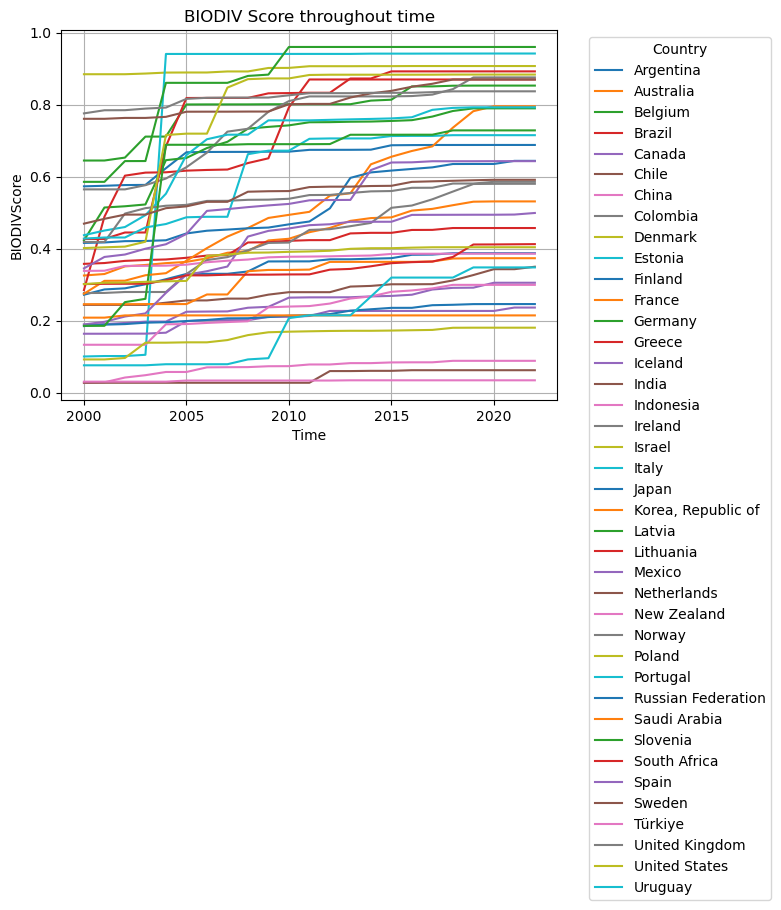

Countries in sspi_countries but not found in the DataFrame's index:
['Austria', 'Czechia', 'Hungary', 'Kuwait', 'Luxembourg', 'Singapore', 'Slovakia', 'Switzerland', 'United Arab Emirates']


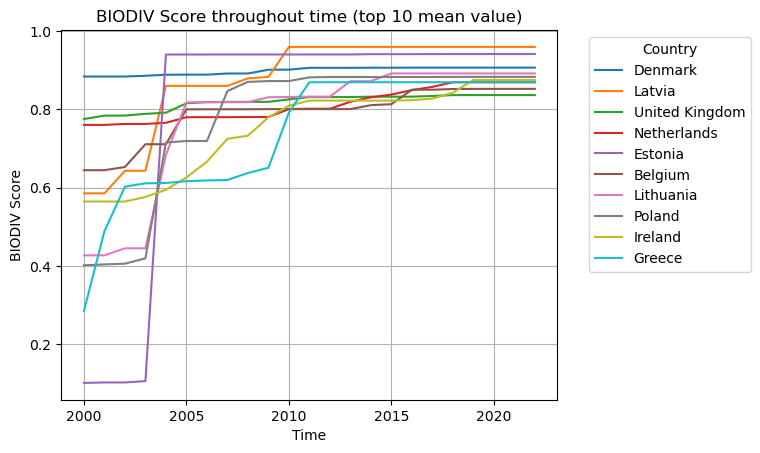

Countries in sspi_countries but not found in the DataFrame's index:
['Austria', 'Czechia', 'Hungary', 'Kuwait', 'Luxembourg', 'Singapore', 'Slovakia', 'Switzerland', 'United Arab Emirates']


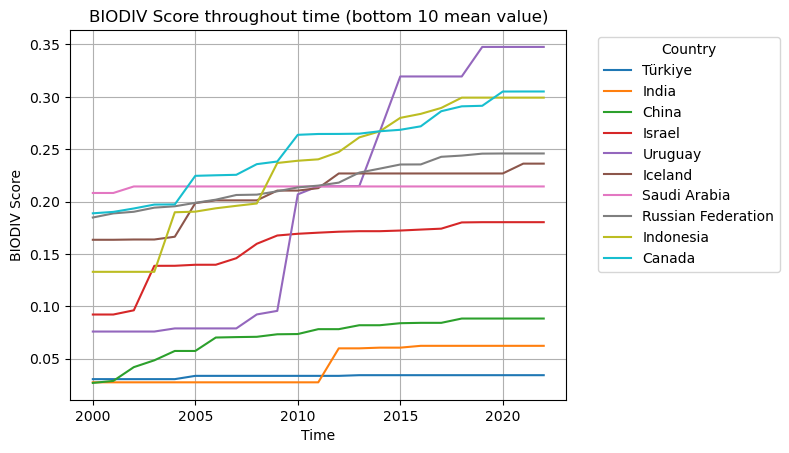

Countries in sspi_countries but not found in the DataFrame's index:
['Austria', 'Czechia', 'Hungary', 'Kuwait', 'Luxembourg', 'Singapore', 'Slovakia', 'Switzerland', 'United Arab Emirates']


In [75]:
biodiv = pd.read_json('BIODIV.json')
line_plot(biodiv, "BIODIV")
top_10(biodiv, "BIODIV")
bottom_10(biodiv, "BIODIV")